# EDSA - Climate Change Belief Analysis 2022

© Explore Data Science Academy

---
### Honour Code

We as Team *2201FTDS_GM4* consisting of {**Alette Baloyi, Nkoka Khosa, Precious Montsha, Mahlatse Philix Ramabopa, Roger Arendse, and Wezo Ntsokota**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Pipeline Developement</a>

<a href=#nine>9. Preparing the test data and submission file </a>

<a href=#ten>10. Final Thoughts and reccomendations</a>



## Data Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between **Apr 27, 2015 and Feb 21, 2018.** In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [203]:
# import comet library
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="bNwa2OhTiQhx360XIO0hT5BLI",
    project_name="climate-change-belief-analysis",
    workspace="rogera11",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/rogera11/climate-change-belief-analysis/032e7fab6c9f460686fe6c8e8024d73f
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/rogera11/climate-change-belief-analysis/e4551d3b400741e68d9d010e93e21f09



In [204]:

# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import nlp libraries
import nltk
import string
import re
import spacy 

# model libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

# Set plot style
sns.set()


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [205]:

# define training data
train_df = pd.read_csv("train.csv")


In [206]:

# define testing data 
test_df = pd.read_csv("test.csv")


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [207]:

# view training data
train_df.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [208]:
# view testing data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [209]:

# view train and test datasets shape
print('Train shape: {}'.format(train_df.shape))
print('Test shape: {}'.format(test_df.shape))


Train shape: (15819, 3)
Test shape: (10546, 2)


In [210]:

# view training info
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [211]:

# view test info
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


### 3.1 Looking at Data Statistics

In [212]:

# view missing values in train_df
train_df.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [213]:

# view missing values in test_df
test_df.isnull().sum()


message    0
tweetid    0
dtype: int64

In [214]:

# Print off a list of all sentiment classes present in this dataset.
class_labels = list(train_df.sentiment.unique())
print(class_labels)


[1, 2, 0, -1]


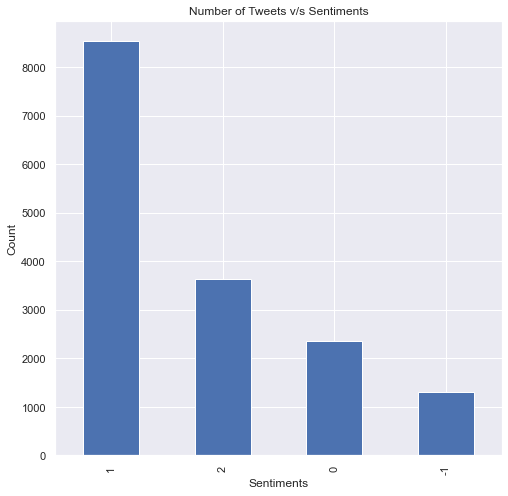

In [215]:

# plot the bar graph to see the distribution of our 'df_train' sentiment.
sns.set(rc = {'figure.figsize':(8,8)})
labels = ['1', '2','0','-1']
bargraph = train_df["sentiment"].value_counts()
bargraph.plot(kind = "bar", title = "Number of Tweets v/s Sentiments", xlabel = "Sentiments", ylabel = "Count")
plt.show()


In [216]:
# create percentage list
percentage = []
for i in bargraph:
    percent = (round((i/sum(bargraph))*100, 1))
    percentage.append(percent)

# view percentage
percentage
    

[53.9, 23.0, 14.9, 8.2]

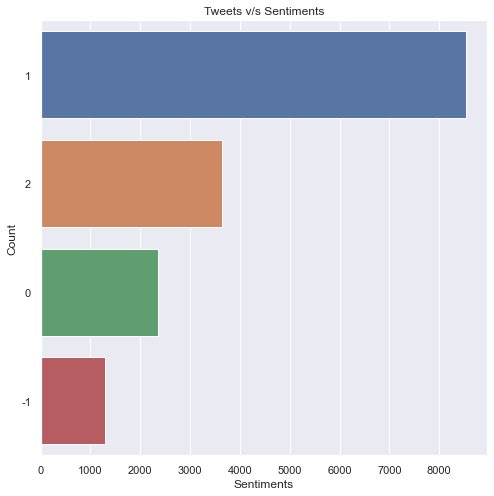

In [218]:

# Plotting the bar graph to see the distrinution of our 'train_df' sentiment with our classses arragend.
sns.barplot(x=bargraph, y=labels, data=train_df).set_title("Tweets v/s Sentiments")
plt.ylabel("Count")
plt.xlabel("Sentiments")
#plt.bar_label(percentage)
plt.show()


### 3.1 Resampling Data

In [270]:
# create variables
news = train_df[train_df['sentiment'] == 2]
pro = train_df[train_df['sentiment'] == 1]
neutral = train_df[train_df['sentiment'] == 0]
anti = train_df[train_df['sentiment'] == -1]

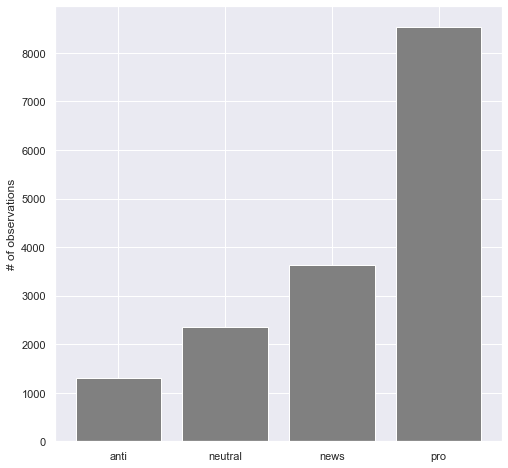

In [271]:
# view distribution
labels = train_df['sentiment'].unique()
heights = [len(news), len(pro), len(neutral), len(anti)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['news', 'pro', 'neutral', 'anti'])
plt.ylabel("# of observations")
plt.show()

In [272]:
# import sampling library
from sklearn.utils import resample

In [273]:
# downsample pro to news length
pro_downsample = resample(pro,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news), # match number in minority class
                          random_state=27) # reproducible results

# upsample anti and neutral
anti_upsample = resample(anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(news), # match number in minority class
                          random_state=27) # reproducible results

neutral_upsample = resample(neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(news), # match number in minority class
                          random_state=27) # reproducible results

In [277]:
# combine sampled
sampled_df = pd.concat([news, pro_downsample, anti_upsample, neutral_upsample])

# Check new class counts
sampled_df['sentiment'].value_counts()

 2    3640
 1    3640
-1    3640
 0    3640
Name: sentiment, dtype: int64

### 3.2 Data Cleaning
#### 3.2.1 Removing Noise and Making Lowercase

- Removing website links

In [278]:

# Removing the website link using 'regex' and replace it with "url-web"
pattern_url = r"http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+"
subs_url = r"url-web"
sampled_df["message"] = sampled_df["message"].replace(to_replace=pattern_url, value=subs_url, regex=True)

sampled_df.head(2)


,sentiment,message,tweetid,final_message
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher say we have three year ...
12,2,rt tveitdal we only have a percent chance of ...,454673,rt tveitdal we only have a percent chance of...


In [279]:

# Removing the website link using 'regex' and replace it with "url-web" in test_df
pattern_url = r"http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+"
subs_url = r"url-web"
test_df["message"] = test_df["message"].replace(to_replace=pattern_url, value=subs_url, regex=True)

test_df.head(2)


,message,tweetid,final_message
0,europe will now be looking to china to make su...,169760,europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffer re cl...


In [281]:
# for both sampled_df and test_df
# count number of times url appears in message
train = sampled_df.message.str.count('url').sum()
test = test_df.message.str.count('url').sum()

# view count
print('Train ''url'' count: {}'.format(train))
print('Test ''url'' count: {}'.format(test))

Train url count: 2
Test url count: 0


In [282]:
# remove url in both sampled_df and test_df
sampled_df["message"] = sampled_df["message"].str.replace('url', '')
test_df["message"] = test_df["message"].str.replace('url', '')

In [283]:
# for both sampled_df and test_df
# count number of times url appears in message
train = sampled_df.message.str.count('url').sum()
test = test_df.message.str.count('url').sum()

# view count
print('Train ''url'' count: {}'.format(train))
print('Test ''url'' count: {}'.format(test))

Train url count: 0
Test url count: 0


- Convert text to lowercase

In [284]:

# lowercase all characters in sampled_df
sampled_df["message"] = sampled_df["message"].str.lower()
sampled_df.head(3)


,sentiment,message,tweetid,final_message
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher say we have three year ...
12,2,rt tveitdal we only have a percent chance of ...,454673,rt tveitdal we only have a percent chance of...
14,2,fossil fuel giant exxonmobil misled the publ...,658092,fossil fuel giant exxonmobil mislead the p...


In [285]:

# lowercase all characters in test_df
test_df["message"] = test_df["message"].str.lower()
test_df.head(3)


,message,tweetid,final_message
0,europe will now be looking to china to make su...,169760,europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,the scary unimpeachable evidence that climate ...


- Removing punctuations

In [286]:

# init punctuation in string library
my_punct = string.punctuation

# create function to remove puntuation
def remove_punctuation(message):
    return ''.join([l for l in message if l not in my_punct])


In [287]:
# remove punctuation in sampled_df
sampled_df["message"] = sampled_df["message"].apply(remove_punctuation)
sampled_df.head(4)

,sentiment,message,tweetid,final_message
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher say we have three year ...
12,2,rt tveitdal we only have a percent chance of ...,454673,rt tveitdal we only have a percent chance of...
14,2,fossil fuel giant exxonmobil misled the publ...,658092,fossil fuel giant exxonmobil mislead the p...
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confront climate change head on web...


In [288]:
# remove punctuation in test_df 
test_df["message"] = test_df["message"].apply(remove_punctuation)
test_df.head(4)

,message,tweetid,final_message
0,europe will now be looking to china to make su...,169760,europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,the scary unimpeachable evidence that climate ...
3,karoli morgfair osborneink dailykos putin go...,476263,karoli morgfair osborneink dailykos putin g...


- Remove \r\n characters from string

In [289]:
# view occurance of \r\n in both sampled_df and test_df
train = sampled_df.message.str.count(r'[^ \w\.]').sum()
test = test_df.message.str.count(r'[^ \w\.]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


In [290]:
# remove \r\n characters in sampled_df
pattern = r'[^ \w\.]'
sampled_df["message"] = sampled_df["message"].replace(to_replace=pattern, value=' ', regex=True)

In [291]:
# remove \r\n characters in test_df
pattern = r'[^ \w\.]'
test_df["message"] = test_df["message"].replace(to_replace=pattern, value=' ', regex=True)

In [292]:
# view occurance of \r\n in both sampled_df and test_df again
train = sampled_df.message.str.count(r'[^ \w\.]').sum()
test = test_df.message.str.count(r'[^ \w\.]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


It worked!

- Remove all non-digit types

In [293]:
# view occurance of non letter types in both sampled_df and test_df
train = sampled_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


In [294]:
# remove non-digit type characters from sampled_df
pattern = r'[^a-zA-Z0-9 ]'
sampled_df["message"] = sampled_df["message"].replace(to_replace=pattern, value='', regex=True)


In [295]:
# remove non-digit types from test_df
pattern = r'[^a-zA-Z0-9 ]'
test_df["message"] = test_df["message"].replace(to_replace=pattern, value='', regex=True)

In [296]:
# to see if it worked view occurance of non letter types in both sampled_df and test_df
train = sampled_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.message.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


In [237]:
# remove all numbers from train_df
pattern = r'[0-9\n]'
train_df["message"] = train_df["message"].replace(to_replace=pattern, value='', regex=True)

In [297]:
# remove all numbers from test_df
pattern = r'[0-9\n]'
test_df["message"] = test_df["message"].replace(to_replace=pattern, value='', regex=True)

In [298]:
sampled_df.head()

,sentiment,message,tweetid,final_message
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher say we have three year ...
12,2,rt tveitdal we only have a percent chance of ...,454673,rt tveitdal we only have a percent chance of...
14,2,fossil fuel giant exxonmobil misled the publ...,658092,fossil fuel giant exxonmobil mislead the p...
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confront climate change head on web...
32,2,rt latimes atmospheric rivers fueled by climat...,143471,rt latimes atmospheric river fuel by climate c...


#### 3.2.3 Lemmatization


In [299]:
# init spacy
nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

In [300]:
# lemmatize message
sampled_df['final_message'] = sampled_df['message'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
test_df['final_message'] = test_df['message'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [301]:
# view sampled_df 
sampled_df.head()

,sentiment,message,tweetid,final_message
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher say we have three year ...
12,2,rt tveitdal we only have a percent chance of ...,454673,rt tveitdal we only have a percent chance of...
14,2,fossil fuel giant exxonmobil misled the publ...,658092,fossil fuel giant exxonmobil mislead the p...
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confront climate change head on web...
32,2,rt latimes atmospheric rivers fueled by climat...,143471,rt latimes atmospheric river fuel by climate c...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [302]:
# feature and labels
X = np.array(sampled_df['message'])
y = np.array(sampled_df['sentiment'])

In [333]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [367]:
# init LogisticRegression model
logreg = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression())])

In [335]:
# init RandomForestClassifier model
rfc = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('tfidf', TfidfTransformer()),
                 ('clf', RandomForestClassifier())])

In [336]:
# init KNeighborsClassifier model
knn = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('tfidf', TfidfTransformer()),
                 ('clf', KNeighborsClassifier())])

In [337]:
# init SVC model
svc = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('tfidf', TfidfTransformer()),
                 ('clf', SVC())])

In [338]:
# init MultinomialNB model
mnnb = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB())])

In [339]:
# create logreg pickle file
import pickle

model_save_path = 'Logistic_Regression.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(multi, file)

In [340]:
# create rfc pickle file
import pickle

model_save_path = 'Random_Forest.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(multi, file)

In [341]:
# create knn pickle file
import pickle

model_save_path = 'knn.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(multi, file)

In [342]:
# create svc pickle file
import pickle

model_save_path = 'Support_Vector_Machine.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(multi, file)

In [343]:
# create mnnb pickle file
import pickle

model_save_path = 'Multinomial_NB.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(multi, file)

In [369]:
# train logreg model
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

c:\Users\Roger Arendse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [370]:
# train rfc model
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [371]:
# train knn model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [372]:
# train svc model
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [375]:
# train mnnb model
mnnb.fit(X_train, y_train)
y_pred_mnnb = mnnb.predict(X_test)

In [376]:
# create logreg performance variables
logreg_f1 = f1_score(y_test, y_pred, average='macro')
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

In [377]:
# create rfc performance variables
rfc_f1 = f1_score(y_test, y_pred, average='macro')
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

In [378]:
# create knn performance variables
knn_f1 = f1_score(y_test, y_pred, average='macro')
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [379]:
# create svc performance variables
svc_f1 = f1_score(y_test, y_pred, average='macro')
svc_accuracy = accuracy_score(y_test, y_pred_svc)

In [380]:
# create mnnb performance variables
mnnb_f1 = f1_score(y_test, y_pred, average='macro')
mnnb_accuracy = accuracy_score(y_test, y_pred_mnnb)

In [382]:
# view various models performance
print('LogisticRegression\n')
print('F1: {}'.format(logreg_f1))
print('Accuracy: {}\n'.format(logreg_accuracy))
print('RandomForest\n')
print('F1: {}'.format(rfc_f1))
print('Accuracy: {}\n'.format(rfc_accuracy))
print('KNeighbors\n')
print('F1: {}'.format(knn_f1))
print('Accuracy: {}\n'.format(knn_accuracy))
print('SupportVector\n')
print('F1: {}'.format(svc_f1))
print('Accuracy: {}\n'.format(svc_accuracy))
print('MultinomialNB\n')
print('F1: {}'.format(mnnb_f1))
print('Accuracy: {}'.format(mnnb_accuracy))

LogisticRegression

F1: 0.805744092414194
Accuracy: 0.8076923076923077

RandomForest

F1: 0.805744092414194
Accuracy: 0.7912087912087912

KNeighbors

F1: 0.805744092414194
Accuracy: 0.6258241758241758

SupportVector

F1: 0.805744092414194
Accuracy: 0.8357142857142857

MultinomialNB

F1: 0.805744092414194
Accuracy: 0.7684065934065935


In [383]:
# create dictionary to store parameters and metrics
params = { 
    'test_size': 0.25,
    'random_state': 27,
    'model_type': 'logreg'
}

metrics = {
    'f1': f1, 
    'accuracy': accuracy
}

In [384]:
# log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [385]:
# end comet experiment
experiment.end()

<a id="nine"></a>
## 6. Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [387]:
# vectorize feature for test_df
X_feature = test_df['message']

# prediction 
logreg_pred = logreg.predict(X_feature)
rfc_pred = rfc.predict(X_feature)
knn_pred = knn.predict(X_feature)
svc_pred = svc.predict(X_feature)
mnnb_pred = mnnb.predict(X_feature)


In [388]:
# create submission dataframe
submission_logreg = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': logreg_pred})
submission_rfc = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': rfc_pred})
submission_knn = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': knn_pred})
submission_svc = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': svc_pred})
submission_mnnb = pd.DataFrame({'tweetid': test_df.tweetid,
                       'sentiment': mnnb_pred})

# create submission file
submission_logreg.to_csv('Submissions/TeamGm4_Submission_6.csv', index=False)
submission_rfc.to_csv('Submissions/TeamGm4_Submission_6.csv', index=False)
submission_knn.to_csv('Submissions/TeamGm4_Submission_6.csv', index=False)
submission_svc.to_csv('Submissions/TeamGm4_Submission_6.csv', index=False)
submission_mnnb.to_csv('Submissions/TeamGm4_Submission_6.csv', index=False)
